In [241]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

stations={}
for line in open('stations.txt'):
    if 'GSN' in line:
        fields = line.split()
        stations[fields[0]] = ' '.join(fields[4:])
        
# define data type for all columns
alttype = np.dtype([('f0', 'U11'), ('int0', 'i4'), ('int1', 'i2'),('f1', 'U4'),('int2', 'i2'),('int3', 'i2'),
                    ('int4', 'i2'),('int5', 'i2'),('int6', 'i2'),('int7', 'i2'),('int8', 'i2'),('int9', 'i2'),
                    ('int10', 'i2'),('int11', 'i2'),('int12', 'i2'),('int13', 'i2'),('int14', 'i2') ,('int15', 'i2'),
                    ('int16', 'i2'),('int17', 'i2'),('int18', 'i2'),('int19', 'i2'),('int20', 'i2'),
                    ('int21', 'i2'),('int22', 'i2'),('int23', 'i2'),('int24', 'i2'),('int25', 'i2'),('int26', 'i2'),
                    ('int27', 'i2'),('int28', 'i2'),('int29', 'i2'),('int30', 'i2'),('int31', 'i2'),('int32', 'i2'),
                    ('int33', 'i2'),('int34', 'i2'),('int35', 'i2'),('int36', 'i2'),('int37', 'i2'),('int38', 'i2'),
                    ('int39', 'i2'),('int40', 'i2'),('int41', 'i2'),('int42', 'i2'),('int43', 'i2'),('int44', 'i2'),
                    ('int45', 'i2'),('int46', 'i2'),('int47', 'i2'),('int48', 'i2'),('int49', 'i2'),('int50', 'i2'),
                    ('int51', 'i2'),('int52', 'i2'),('int53', 'i2'),('int54', 'i2'),('int55', 'i2'),('int56', 'i2'),
                    ('int57', 'i2'),('int58', 'i2'),('int59', 'i2'),('int60', 'i2'),('int61', 'i2'),('int62', 'i2')
                   ]) 
#  each number in array represent of the word lenght must toke in each column  
aldelimiter=([11,4,2,4,5,3,5,3,5,3,5,3,5,3,5,3,5,3,5,3,5,3,5,3,5,3,5,3,5,3,5,3,5,3,5,3,5,3,5,3,5,3,5,3,5,3,5,3,5,3,5,
              3,5,3,5,3,5,3,5,3,5,3,5,3,5,3,5]) 

#Choose Columns required
alusecols=(1,2,3,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64)


lihue = np.genfromtxt('USW00022536.dly',autostrip=True ,dtype=alttype,delimiter=aldelimiter,usecols=alusecols)
print(lihue)


    
  



[ (1950, 2, 'TMAX', 256, 256, 256, 267, 217, 228, 256, 272, 256, 256, 256, 244, 256, 256, 244, 244, 250, 256, 239, 250, 256, 256, 267, 261, 267, 267, 261, 261, -9999, -9999, -9999)
 (1950, 2, 'TMIN', 178, 156, 161, 167, 167, 167, 189, 211, 206, 217, 217, 211, 200, 200, 206, 183, 206, 206, 206, 194, 206, 200, 206, 200, 211, 183, 172, 200, -9999, -9999, -9999)
 (1950, 2, 'PRCP', 0, 0, 0, 0, 737, 406, 36, 38, 0, 0, 0, 0, 18, 5, 10, 18, 15, 5, 0, 0, 23, 10, 3, 48, 0, 0, 0, 5, -9999, -9999, -9999)
 ...,
 (2015, 9, 'WT03', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, 1, -9999, 1, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999)
 (2015, 9, 'WT08', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, 1, -9999, -9999, -9999, 1, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, 1, 1, -9999, -9999, -9999, -9999, -9999, -9999)
 (2015, 9, 'WT10', -9999, -9999, -9999, -9999, -

In [242]:

# to convert single digit to two digits like 1 convert to 01
def month(m): 
    m=str(m)
    if(len(m)==1):
        return '0'+m
    else:
        return m   

def unroll(lihue):
    # get strat date like 1950-2
    start_date = str(lihue[0])+'-'+month(lihue[1]) 
    # add one month to start date 1950-2 +1 = 1950-3
    end_date=    np.datetime64(start_date,'M')+1 
    # creat array contain all date in month  
    alldate=np.arange(str(start_date), str(end_date), dtype='datetime64[D]')  
   
    dataset = ([])
    index=3 # strat of index 3 to read temp value
    for date in alldate:
        value =float(lihue[index]/10)
        dataset.append([date,value])
        index=index+1
    return dataset  

unroll(lihue[0])
 

[[numpy.datetime64('1950-02-01'), 25.6],
 [numpy.datetime64('1950-02-02'), 25.6],
 [numpy.datetime64('1950-02-03'), 25.6],
 [numpy.datetime64('1950-02-04'), 26.7],
 [numpy.datetime64('1950-02-05'), 21.7],
 [numpy.datetime64('1950-02-06'), 22.8],
 [numpy.datetime64('1950-02-07'), 25.6],
 [numpy.datetime64('1950-02-08'), 27.2],
 [numpy.datetime64('1950-02-09'), 25.6],
 [numpy.datetime64('1950-02-10'), 25.6],
 [numpy.datetime64('1950-02-11'), 25.6],
 [numpy.datetime64('1950-02-12'), 24.4],
 [numpy.datetime64('1950-02-13'), 25.6],
 [numpy.datetime64('1950-02-14'), 25.6],
 [numpy.datetime64('1950-02-15'), 24.4],
 [numpy.datetime64('1950-02-16'), 24.4],
 [numpy.datetime64('1950-02-17'), 25.0],
 [numpy.datetime64('1950-02-18'), 25.6],
 [numpy.datetime64('1950-02-19'), 23.9],
 [numpy.datetime64('1950-02-20'), 25.0],
 [numpy.datetime64('1950-02-21'), 25.6],
 [numpy.datetime64('1950-02-22'), 25.6],
 [numpy.datetime64('1950-02-23'), 26.7],
 [numpy.datetime64('1950-02-24'), 26.1],
 [numpy.datetime

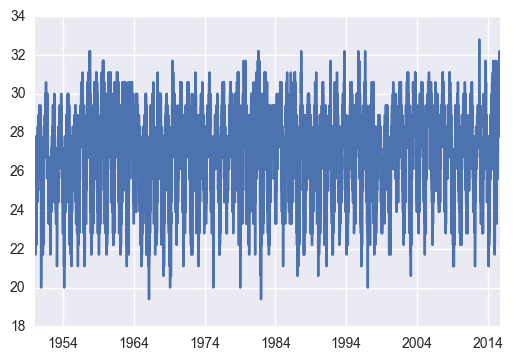

In [243]:
def getobs(file,type_temp):
    # define data type for all columns
    alttype = np.dtype([('f0', 'U11'), ('int0', 'i4'), ('int1', 'i2'),('f1', 'U4'),('int2', 'i2'),('int3', 'i2'),
                    ('int4', 'i2'),('int5', 'i2'),('int6', 'i2'),('int7', 'i2'),('int8', 'i2'),('int9', 'i2'),
                    ('int10', 'i2'),('int11', 'i2'),('int12', 'i2'),('int13', 'i2'),('int14', 'i2') ,('int15', 'i2'),
                    ('int16', 'i2'),('int17', 'i2'),('int18', 'i2'),('int19', 'i2'),('int20', 'i2'),
                    ('int21', 'i2'),('int22', 'i2'),('int23', 'i2'),('int24', 'i2'),('int25', 'i2'),('int26', 'i2'),
                    ('int27', 'i2'),('int28', 'i2'),('int29', 'i2'),('int30', 'i2'),('int31', 'i2'),('int32', 'i2'),
                    ('int33', 'i2'),('int34', 'i2'),('int35', 'i2'),('int36', 'i2'),('int37', 'i2'),('int38', 'i2'),
                    ('int39', 'i2'),('int40', 'i2'),('int41', 'i2'),('int42', 'i2'),('int43', 'i2'),('int44', 'i2'),
                    ('int45', 'i2'),('int46', 'i2'),('int47', 'i2'),('int48', 'i2'),('int49', 'i2'),('int50', 'i2'),
                    ('int51', 'i2'),('int52', 'i2'),('int53', 'i2'),('int54', 'i2'),('int55', 'i2'),('int56', 'i2'),
                    ('int57', 'i2'),('int58', 'i2'),('int59', 'i2'),('int60', 'i2'),('int61', 'i2'),('int62', 'i2')
                   ])

    #  each number in array represent of the word lenght must toke in each column  
    aldelimiter=([11,4,2,4,5,3,5,3,5,3,5,3,5,3,5,3,5,3,5,3,5,3,5,3,5,3,5,3,5,3,5,3,5,3,5,3,5,3,5,3,5,3,5,3,5,3,5,3,5,3,5,
              3,5,3,5,3,5,3,5,3,5,3,5,3,5,3,5])

    #Choose Columns required
    alusecols=(1,2,3,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64)


    lihue = np.genfromtxt(file,autostrip=True ,dtype=alttype,delimiter=aldelimiter,usecols=alusecols)
    list_data =([])
    for data in lihue:
            if(data[2]==type_temp): # type of temp ex TMAX or TMIN
                list_data.extend(unroll(data))
            
    df = pd.DataFrame(data = list_data, columns=['date','value'])
    
    #change all value contain -999.9 to Null
    df.ix[df.value == -999.9, 'value'] = np.nan 
    #make interpolate for data value
    df.interpolate()
    return df
    
    


lihue_tmax=getobs('USW00022536.dly','TMAX')
lihue_tmin=getobs('USW00022536.dly','TMIN')

plt.plot(lihue_tmax['date'],lihue_tmax['value'])





In [16]:
np.mean(lihue_tmin['value']), np.mean(lihue_tmax['value'])


(21.05077365808907, 27.30055467512005)

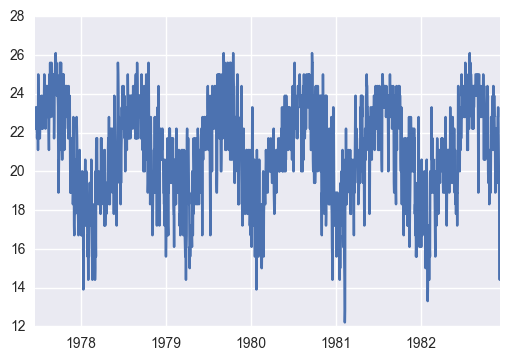

In [210]:
plt.plot(lihue_tmin[10000:12000]['date'],lihue_tmin[10000:12000]['value'])




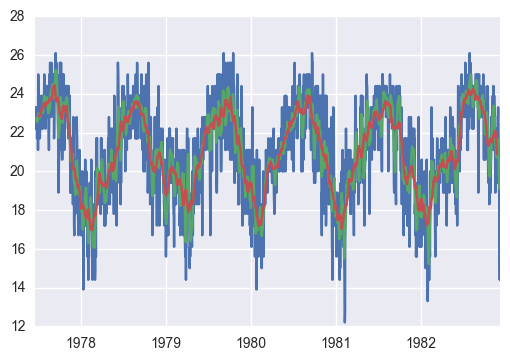

In [244]:
def plot_smoothed(data,win=10):
    #smoothendData value by mean
    value=data['value'].rolling(center=True,window=win).mean()
    plt.plot(data['date'],value)
    
plt.plot(lihue_tmin[10000:12000]['date'],lihue_tmin[10000:12000]['value'])
plot_smoothed(lihue_tmin[10000:12000]) 
plot_smoothed(lihue_tmin[10000:12000],30)    
    



(712588.0, 734503.0, -10, 30)

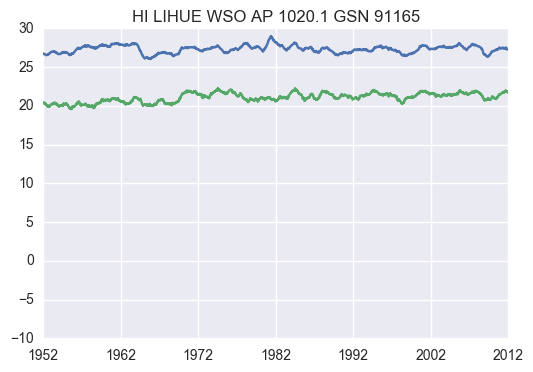

In [231]:
plot_smoothed(getobs('USW00022536.dly','TMAX'),365)
plot_smoothed(getobs('USW00022536.dly','TMIN'),365)
plt.title(stations['USW00022536'])
plt.axis(xmin=np.datetime64('1952'),xmax=np.datetime64('2012'),ymin=-10,ymax=30)


#lihue_tmax=getobs('USW00022536.dly','TMAX')

(712588.0, 734503.0, -10, 30)

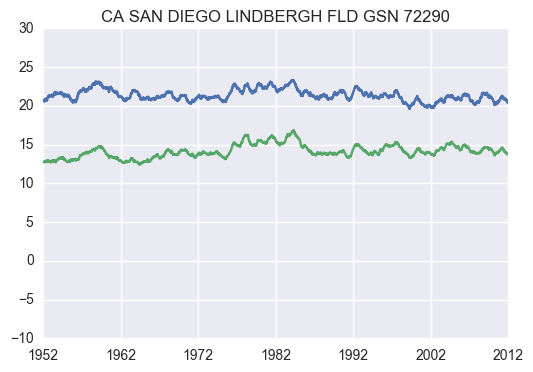

In [235]:
plot_smoothed(getobs('USW00023188.dly','TMAX'),365)
plot_smoothed(getobs('USW00023188.dly','TMIN'),365)
plt.title(stations['USW00023188'])

plt.axis(xmin=np.datetime64('1952'),xmax=np.datetime64('2012'),ymin=-10,ymax=30)

(712588.0, 734503.0, -10, 30)

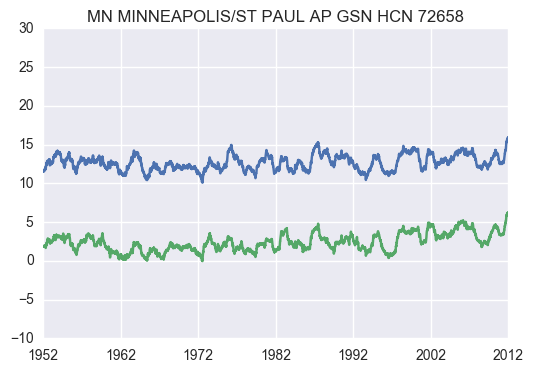

In [236]:


plot_smoothed(getobs('USW00014922.dly','TMAX'),365)
plot_smoothed(getobs('USW00014922.dly','TMIN'),365)
plt.title(stations['USW00014922'])

plt.axis(xmin=np.datetime64('1952'),xmax=np.datetime64('2012'),ymin=-10,ymax=30)

(712588.0, 734503.0, -10, 30)

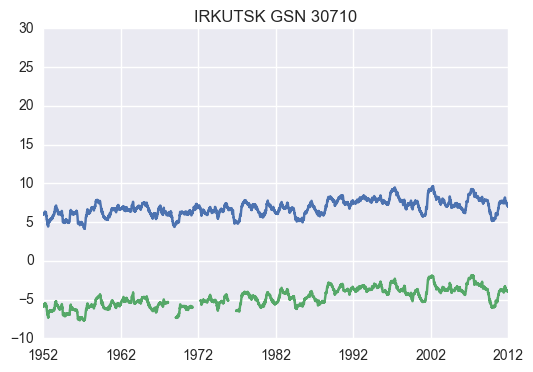

In [234]:
plot_smoothed(getobs('RSM00030710.dly','TMAX'),365)
plot_smoothed(getobs('RSM00030710.dly','TMIN'),365)
plt.title(stations['RSM00030710'])

plt.axis(xmin=np.datetime64('1952'),xmax=np.datetime64('2012'),ymin=-10,ymax=30)
